In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


All working files both data and code will be availabe in `lyrics_generation` folder.

In [ ]:
%cd '/content/drive/MyDrive/lyrics_generation/'

/content/drive/MyDrive/lyrics_generation


We consider the dataset [Taylor Swift All Lyrics](https://www.kaggle.com/datasets/ishikajohari/taylor-swift-all-lyrics-30-albums), which has the lyrics of almost all, if not all, of Taylor Swift's songs from 46 albums. The lyrics are in a textual format (.txt) for maximum user flexibility. Additionally, the dataset includes cover art for each of these albums.

In this captivating article, we delve into the fascinating world of music analysis, focusing specifically on Taylor Swift's extensive discography. Prepare to be enthralled as we explore the following intriguing topics:

**Preprocess:** 
- We begin by seamlessly integrating the Kaggle dataset into the Google Drive, leveraging the magic of technology through the provision of the `kaggle_username` and `kaggle_KEY`. 
- With a whopping 500 songs spanning across 46 captivating albums, we meticulously engage in essential data cleaning processes, ensuring a pristine foundation for our analysis.

**Basic Text Analysis:**             

- Uncover the secrets hidden within Taylor Swift's poetic verses as we embark on a quest for knowledge.
- Through meticulous exploration, we unveil quantitative insights about songs like the number of unique words, average number of poems per album, average number of words per songs, average number of versus per song and most frequent words etc.

**Sentiment Analysis:** 

 Finally We'll decode the sentiment behind Taylor Swift's heartfelt lyrics. 

## Preprocess
### Load the data from Kaggle

The dataset [Taylor Swift](https://www.kaggle.com/datasets/ishikajohari/taylor-swift-all-lyrics-30-albums) available in [Kaggle](https://www.kaggle.com/).

We provide `KAGGLE_USERNAME` and `KAGGLE_KEY` to access the `kaggle.com`. Then using the page link, able to download the dataset into Google drive in two steps. The snippet of codes given in below chunks. Further details, you can vist to [Sasiwut](https://medium.com/analytics-vidhya/how-to-directly-download-kaggle-dataset-to-google-drive-aa06175712e2) medium article.


In [ ]:
#Configuration environment
#import os

#os.environ['KAGGLE_USERNAME'] = "xxxxx" # username from the json file
#os.environ['KAGGLE_KEY'] = "xxxxxxxxxxxxxxxxxxxxxxxxxxx" # key from the json file

In [ ]:
#!kaggle datasets download -d ishikajohari/taylor-swift-all-lyrics-30-albums

 86% 14.0M/16.3M [00:00<00:00, 68.5MB/s]
100% 16.3M/16.3M [00:00<00:00, 73.9MB/s]


In [ ]:
#!dir

taylor-swift-all-lyrics-30-albums.zip  Taylor\ Swift\ Lyrics\ Analysis.ipynb


In [ ]:
#!unzip taylor-swift-all-lyrics-30-albums.zip -d taylor_swift_lyrics


### Data Cleaning

Now data downloaded into Google drive. In the section, we load the data and pre-process it.

In [ ]:
# load basic modules
import os
import re
import pandas as pd 
import numpy as np 

In [ ]:
os.listdir()

['Taylor Swift Lyrics Analysis.ipynb',
 'taylor-swift-all-lyrics-30-albums.zip',
 'taylor_swift_lyrics']

In [ ]:
main_path = '/content/drive/MyDrive/lyrics_generation/'

In [ ]:
#wrapper function to save pre-processed files
def save_text(text, path, file_name):
    file_path = os.path.join(path, file_name) 
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(text)


In [ ]:
#store all cleaned files together
path = '../lyrics_generation/Data/'
#collect song folled by the album name
df_song = {'song_title': [],'album_name':[]}
#Albums path
albums_path = '../lyrics_generation/taylor_swift_lyrics/data/Albums/'
for root, dirs, files in os.walk(albums_path):
  for album in dirs:
    #album directory
    album_path = os.path.join(albums_path,album)
    for file in os.listdir(album_path):
      file_path = os.path.join(album_path,file)
      with open(file_path,'r') as f:
        raw_lyrics = f.read()
        raw_lyrics2 = raw_lyrics.encode("ascii", "ignore")
        raw_lyrics3 = raw_lyrics2.decode()
        raw_lyrics4 = re.sub('[0-9]+Embed',"",raw_lyrics3)
        raw_lyrics5 = raw_lyrics4.splitlines()
        #remove unnessary in the first row of each song
        match = re.search(r'\[(.*?)\]', raw_lyrics5[0])
        if match:
          raw_lyrics5[0] = match.group(1)
        raw_lyrics6 = '\n'.join(raw_lyrics5)
        raw_lyrics7 = re.sub('\[|\]|\(|\)','',raw_lyrics6)
        raw_lyrics8 = raw_lyrics7.lower()
        save_text(raw_lyrics7,path,album+file)
        print(f"The file {album}-{file} saved")
      df_song['song_title'].append(file[:-4])
      df_song['album_name'].append(album)

In [ ]:
song_df=pd.DataFrame(df_song)
song_df.shape

(500, 2)

### Basic Text Analysis

We have some basic queries about the data.

- What are maximum and minimum number of songs for a given album?
- Which songs has max and min number of words?
- What is the average number of words for given song?
- What are the total number of versus across the songs?
- What is the average number of versus?
- Total number of words?
- Total number of unique words in total 500 songs?
- Which album has more number songs?

In [ ]:
# all the files stored in the directory
files = os.listdir(path)
len(files)

500

In [ ]:
# Initialize variables
word_counts = []
total_verses = 0
total_lines = 0
unique_words = set()

# Iterate through each text file
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    
    # Read the content of the file
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Count the number of words in the song
    words = content.split()
    word_count = len(words)
    word_counts.append(word_count)

    # Count the number of lines
    lines = content.splitlines()
    lines_count= len(lines)
    total_lines += lines_count
    
    # Count the number of verses in the song
    verses = content.split('\n\n')
    verse_count = len(verses)
    total_verses += verse_count
    
    # Add words to the set of unique words
    unique_words.update(words)

   
# Number of words in each song
#for i, count in enumerate(word_counts):
#    print(f"Song {i+1}: {count} words")

# Maximum and minimum number of words
max_words = max(word_counts)
min_words = min(word_counts)
print(f"Maximum words in a song: {max_words}")
print(f"Minimum words in a song: {min_words}")

# Average number of words for a given song
average_words = sum(word_counts) / len(word_counts)
print(f"Average number of words per song: {average_words}")

# Total number of verses across the songs
print(f"Total number of verses: {total_verses}")

# Average number of verses
average_verses = total_verses / len(word_counts)
print(f"Average number of verses per song: {average_verses}")

# Total number of lines across the songs
print(f"Total number of lines: {total_lines}")

# Average number of words per line
average_words_line = total_lines / len(word_counts)
print(f"Average number lines per song: {average_words_line}")

# Total number of words
total_words = sum(word_counts)
print(f"Total number of words: {total_words}")

# Total number of unique words
total_unique_words = len(unique_words)
print(f"Total number of unique words: {total_unique_words}")

Maximum words in a song: 27485
Minimum words in a song: 6
Average number of words per song: 462.888
Total number of verses: 3961
Average number of verses per song: 7.922
Total number of lines: 36849
Average number lines per song: 73.698
Total number of words: 231444
Total number of unique words: 16561


Thus, for a given song on average the number of words 463, and the number of versus 8.

In [ ]:
from collections import Counter

# Iterate through each text file and collect all the words
all_words = []
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    with open(file_path, 'r') as file:
        content = file.read()
        words = content.split()
        all_words.extend(words)

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words
# Change the number 10 to the desired number of words
most_common_words = word_counts.most_common(10)  

# Print the most common words
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


I: 7702 occurrences
the: 7482 occurrences
you: 6292 occurrences
to: 3785 occurrences
a: 3602 occurrences
and: 3119 occurrences
|: 3000 occurrences
And: 2871 occurrences
in: 2846 occurrences
me: 2837 occurrences


Notice that common words (`stopwords`) are more common. We remove the stopwords and analyse the most common words in the Lyrics.

---



In [ ]:
song_df.album_name.value_counts()

Red_TaylorsVersion_                                                 31
Fearless_TaylorsVersion_                                            27
Midnights_3amEdition_                                               20
SpeakNow_Deluxe_                                                    20
Reputation                                                          19
evermore_JapaneseEdition_                                           19
Red                                                                 19
Fearless_PlatinumEdition_                                           19
evermore_deluxeversion_                                             18
Lover                                                               18
evermore_digitallyautographedfanedition_                            18
folklore_thelongpondstudiosessions_RecordStoreDayExclusive_         17
Folklore                                                            16
Midnights_TargetExclusive_                                          16
Taylor

The `Red_TaylorsVersion_ ` has most number (31) of songs.

### Sentiment Analysis

In the concluding section of our analysis, we delve into the fascinating world of sentiment analysis to uncover valuable insights from our data. To accomplish this, we harness the power of nltk's built-in pre-trained sentiment analyzer called VADER (Valence Aware Dictionary and Sentiment Reasoner). With VADER, we embark on a sentiment analysis journey through Taylor Swift's data. 


In [ ]:
# Load and download necessary datasets from nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the required dataset for sentiment analysis
nltk.download(["names",
               "stopwords",
               "state_union",
               "twitter_samples",
               "movie_reviews",
               "averaged_perceptron_tagger",
               "vader_lexicon", #to perform sentiment analysis
               "punkt",
               ])  

#collecting all corpus
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#collect the stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
Lyrics_data = {'song_title':[], 'sentiment':[],'most_common_words':[] }
# Iterate through each text file and analyze the sentiment
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    with open(file_path, 'r') as file:
        content = file.read()
        # collecting all the tokens
        tokens = nltk.word_tokenize(content)
        tokens = [re.sub('[^a-zA-Z0-9]+', '', _) for _ in tokens]
        #remove empty tokens
        tokens = list(filter(None, tokens))
        words = [w for w in tokens if w.lower() not in stopwords]
        #token distribution
        fd = nltk.FreqDist([w.lower() for w in words])
        frequent_words = [w[0] for w in fd.most_common(10)] 
        #fd = nltk.FreqDist([w.lower for w in words])
        #print(f"The most frequent words: {frequent_words}")
        sentiment_scores = sid.polarity_scores(content)
        sentiment = "positive" if sentiment_scores['compound'] >0 else ("negative" if sentiment_scores['compound'] < 0 else "neutral" )
        #print(f"Sentiment of {file_name}: {sentiment}")
        Lyrics_data['song_title'].append(file_name)
        Lyrics_data['sentiment'].append(sentiment)
        Lyrics_data['most_common_words'].append(frequent_words)

In [ ]:
Lyrics_df = pd.DataFrame(Lyrics_data)
Lyrics_df.shape

(500, 3)

In [ ]:
Lyrics_df.head()

,song_title,sentiment,most_common_words
0,19891989_Booklet_.txt,positive,"[oh, ohoh, finally, clean, think, months, nt, ..."
1,1989AllYouHadtoDoWasStay.txt,positive,"[stay, hey, like, want, say, back, oh, let, pe..."
2,1989BadBlood.txt,negative,"[got, baby, blood, bad, think, cause, hey, nt,..."
3,1989BlankSpace.txt,negative,"[love, tell, got, insane, na, nt, cause, gon, ..."
4,1989Clean.txt,positive,"[oh, ohoh, finally, clean, think, months, nt, ..."


In [ ]:
merge_df = pd.concat([song_df.album_name,Lyrics_df],axis=1)

In [ ]:
merge_df.head()

,album_name,song_title,sentiment,most_common_words
0,1989,19891989_Booklet_.txt,positive,"[oh, ohoh, finally, clean, think, months, nt, ..."
1,1989,1989AllYouHadtoDoWasStay.txt,positive,"[stay, hey, like, want, say, back, oh, let, pe..."
2,1989,1989BadBlood.txt,negative,"[got, baby, blood, bad, think, cause, hey, nt,..."
3,1989,1989BlankSpace.txt,negative,"[love, tell, got, insane, na, nt, cause, gon, ..."
4,1989,1989Clean.txt,positive,"[oh, ohoh, finally, clean, think, months, nt, ..."


#### Visualization

In [ ]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

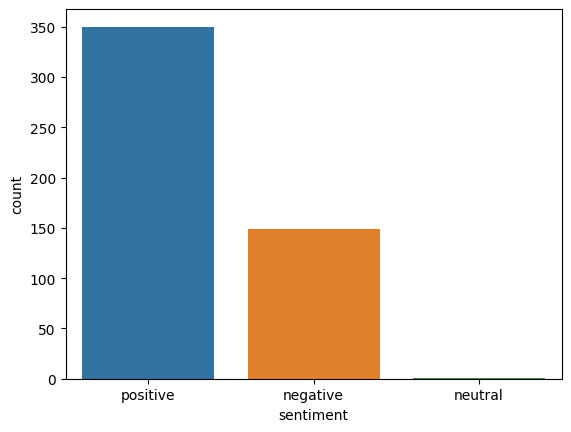

In [ ]:
sns.countplot(x=Lyrics_df["sentiment"])

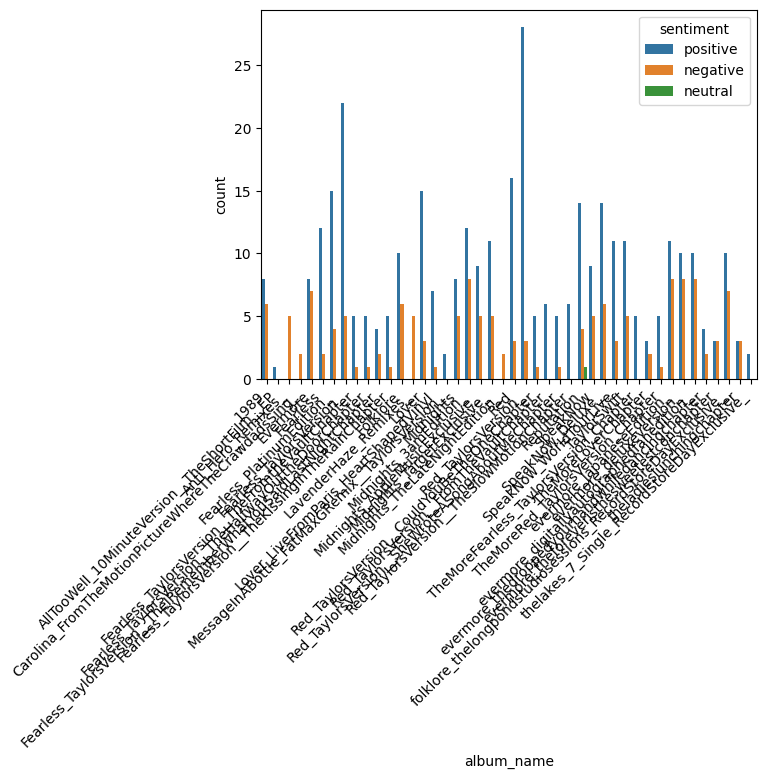

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Generate countplot
ax = sns.countplot(data=merge_df, x="album_name", hue="sentiment")
# Set figure size
plt.figure(figsize=(10, 6))
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Adjust spacing between labels
plt.tight_layout()
# Display the plot
plt.show()


### References

1. [Taylor Swift All Lyrics](https://www.kaggle.com/datasets/ishikajohari/taylor-swift-all-lyrics-30-albums)
2. [How to directly download Kaggle dataset to Google Drive](https://medium.com/analytics-vidhya/how-to-directly-download-kaggle-dataset-to-google-drive-aa06175712e2)
3. [Sentiment Analysis: First Steps With Python's NLTK Library](https://realpython.com/python-nltk-sentiment-analysis/)